In [1]:
#Imports
import os
import random
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import scipy.optimize as opt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

In [3]:
%pylab inline
%matplotlib inline
pylab.rcParams['figure.figsize'] = (14.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


In [4]:
pictures = os.listdir('cutes')

## Problem Klasyfikacji
Klasyfikacja jest problemem związanym z uczeniem nadzorowanym (przy uczeniu nienadzorowanym mówimy o klastrowaniu).
W telegraficznym skrócie, problem polega na stworzeniu funkcji (klasyfikatora), który dla każdego możliwego wejścia, odpowie do jakiej klasy należy dany zbiór cech.

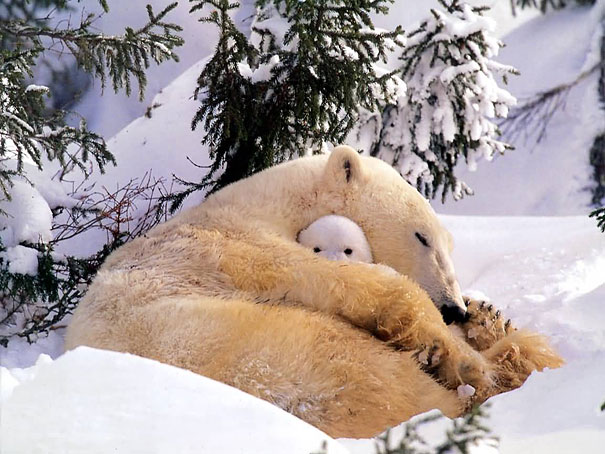

In [16]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

### Przykład praktyczny: detekcja spamu
Zadanie polega na ustaleniu, czy dany mail zawiera niechcianą treść reklamową (SPAM) czy jest wartościowy.

X to wektor opisujący obecność każdego ze słów danego języka (w praktyce podzbiór słów często występujących w SPAMIE), jeśli na danej pozycji jest 0, to oznacza, że słowa nie było w zbiorze, jeśli jest zaś 1, to oznacza że było.

Dla zdania "Ala ma kota", i zbioru słów [Ala, Kot, Pies], wektor ten będzie miał postać [1, 1, 0] (często wszystkie odmiany słowa są wrzucane do jednej kategorii)

Mamy zbudować klasyfikator, który przyjmie taki wektor zer i jedynek, i odpowie, czy dany zbiór cech reprezentuje SPAM czy nie. Odpowiedź zostanie udzielona poprzez jedną z dwóch liczb opisujących kategorie (0 lub 1). Gdzie 0 oznacza, że wiadomość TO SPAM, a 1, że wiadomość Spamem nie jest.

Oczywiście, możemy stworzyć podział na więcej niż dwie kategorie.


# Regresja logistyczna
Regresja logistyczna to obecnie jeden z najpopularniejszych algorytmów AI (Tak twierdzi Ng).
Jest to metoda klasyfikowania (**KLASYFIKATOR**) danych wejściowych na dwie niezależne kategorie.
##Opis problemu Klasyfikowania
Szukamy $$h_\Theta: x \rightarrow y$$
gdzie:
* $x \in \mathbb{R}^n$ - zbiór cech danego problemu
* $y \in \{ 0, 1\}$ - grupy do klasyfikacji

## Regresja logistyczna działa tak samo jak każda inna!

### Przypomnijmy regresję liniową
Hipoteza: $$h_\Theta (x) = \Theta_0 + \Theta_1 \cdot x = \Theta^Tx$$
Gdzie: $\Theta_i$ - Parametry dopasowywane w procesie uczenia

Funkcja kosztu: $$J (\Theta_0, \Theta_1) = \frac{1}{2 \cdot m} \cdot \sum \limits^m_{i=1} (h_\Theta(x^{(i)}) - y^{(i)})^2$$m
Gdzie:
* m - rozmiar zbioru uczącego
* i = $1, \dots m$ - indeksy elementów w zbiorze uczącym
* x , y - Odpowiednio zbiór wejściowy (lewa kolumna) i zbiór wyjściowy  (prawa kolumna). To są Wektory!
* $x^{(i)}$  - i-ty element wektora x
* $h_\Theta(x^{(i)})$ - funkcja(liniowa), którą dopasowujemy
## Różnica pomiędzy regresją liniową a logistyczną

Regresja liniowa daje nam wartości wynikowe (y) jako liczbę rzeczywistą, a my oczekujemy w regresji logistycznej przyporządkowania do jednej z dwóch kategorii (0/1)
### Jak rozwiązać ten problem ?


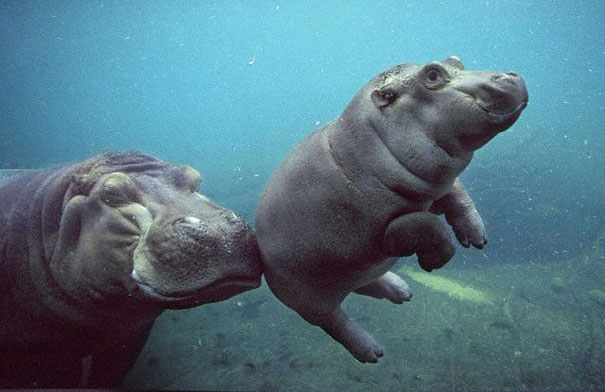

In [4]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

## Granice decyzyjne
nałóżmy na naszą hipotezę jeszcze jedną funkcje ($g(x)$) t. że $g(x) : \mathbb{R} \rightarrow \{0, 1\} $ lub bardziej ogólnie $g(x) : \mathbb{R} \rightarrow [0, 1] $
### Jak mogła by wyglądać taka funkcja?

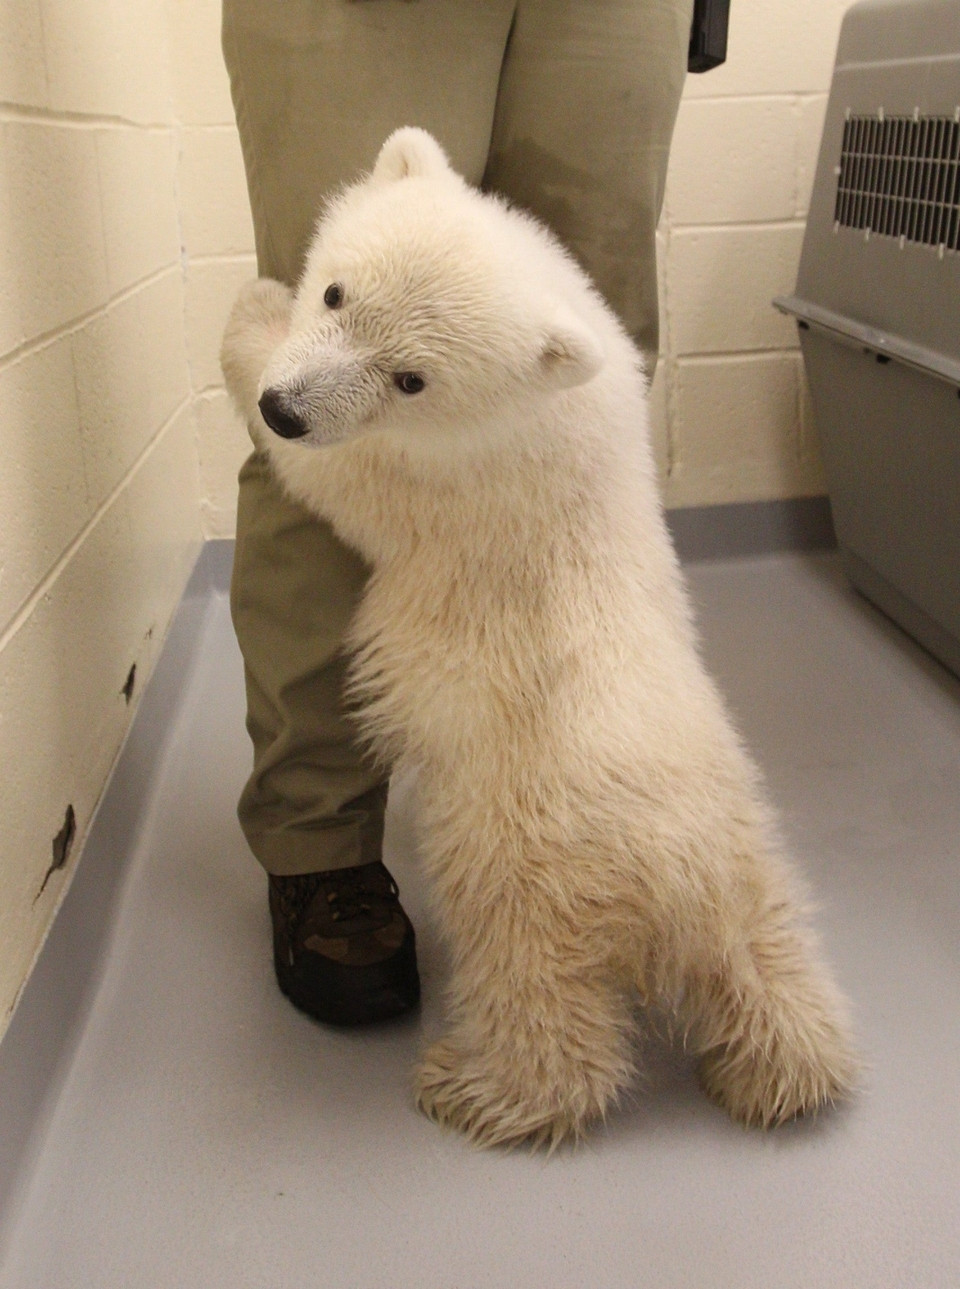

In [133]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

$$  g(x) = \left\{
  \begin{array}{l l}
    1 & \quad \text{jesli $\Theta^TX > 0$}\\
    0 & \quad \text{jesli $\Theta^TX < 0$}
  \end{array} \right.
  $$


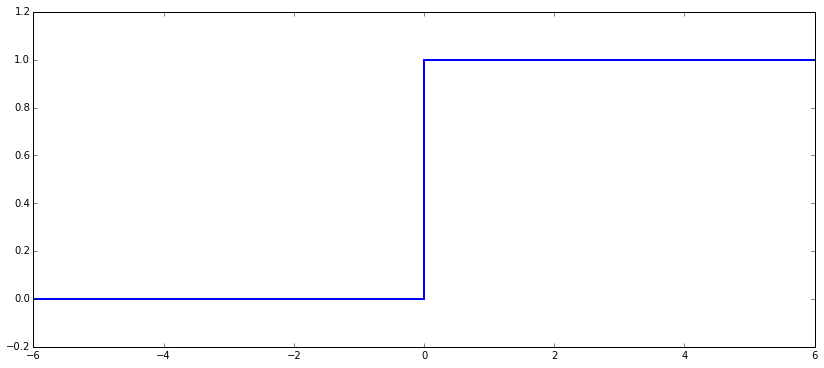

In [120]:
plt.plot([-6, 0], [0, 0], 'b', lw=2)
plt.plot([0, 0], [-0.001, 1.001], 'b', lw=2) # Mała sztuczka, poprawiająca estetyke wykresu :) 
plt.plot([0, 6], [1, 1], 'b', lw=2)
plt.show()

###Jakie ta funkcja ma wady? 

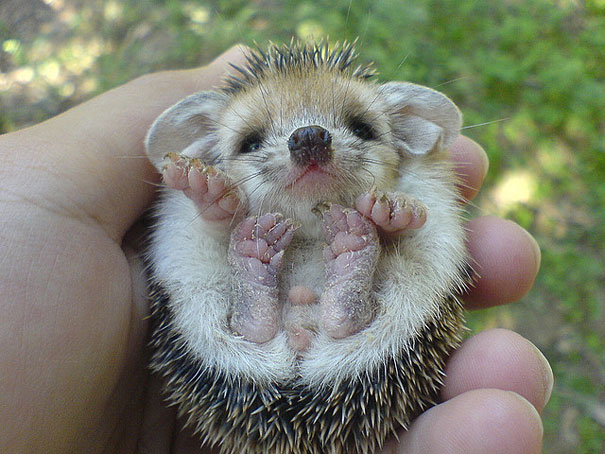

In [44]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

* Jest nieciągła
* Odpowiedź będzie taka sama (1) dla $\Theta^TX = 0.0000001$ i $\Theta^TX = 100$


## Funkcja sigmoidalna

$$g(z) = \frac{1}{1+e^{-z}}$$

###Implementacja


In [85]:
sigmoid = lambda x: 1.0 / (1 + np.exp(-x))

## Jak wygląda funkcja sigmoidalna?

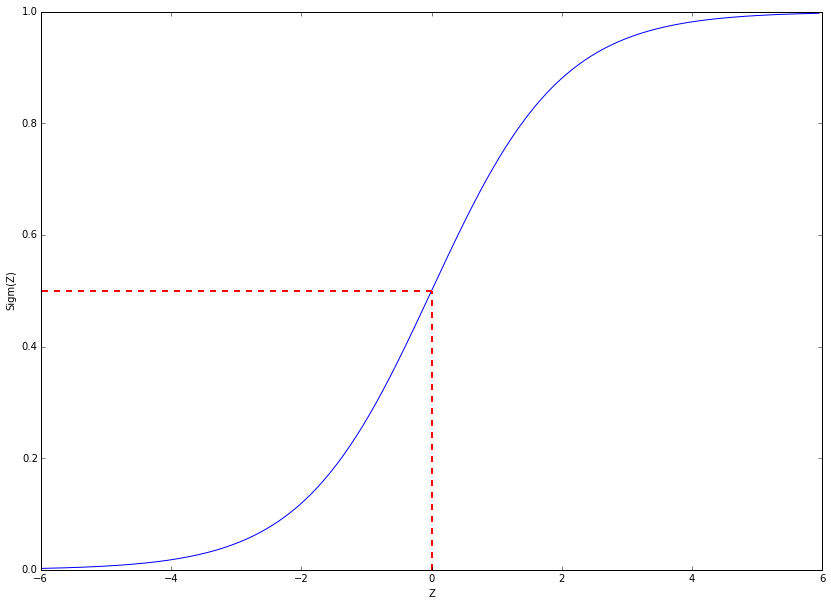

In [72]:
z = np.arange(-6, 6, 0.05)
y = [sigmoid(x) for x in z]
plt.plot(z, y)
plt.plot([0, -6], [0.5, 0.5], 'r--', lw=2)
plt.plot([0, 0], [0, 0.5], 'r--', lw=2)
plt.ylabel('Sigm(Z)')
plt.xlabel('Z')
plt.show()

Powyższa funkcja jest interpretowana jako prawdopodobieństwo warunkowe zajścia danego zdarzenia.
Czyli jeżeli $h_\Theta (x) = 0.7 $ to mamy 70% szans na wystąpienie jakiegoś zjawiska.

Oczywiście, wciąż potrzebujemy tylko jednej z wartości 1 lub 0, więc znowu dodamy granicę decyzyjną (jak w pierwszej funkcji). Nie miej jednak, jest to teraz dużo łatwiej zrobić, ponieważ liczby wynikowe mają nadany sens(prawdopodobieństwo zajścia zdarzenia).

Formalizując:
$$ h_\Theta (x) = p(y=1| x; \Theta) $$

## Reasumując, jak wygląda hipoteza dla regresji logistycznej?

Przypomnienie: Hipoteza w regresji liniowej: $h_\Theta (x) = \sum \limits_{i=1}^m \Theta_i \cdot x_i = \Theta^TX$

Hipoteza dla regresji logistycznej wygląda następująco:
$$ h_\Theta (x) = g(\Theta^TX),\ gdzie\ g(z) = \frac{1}{1+e^{-z}}$$
Po uproszeniu: $$ h_\Theta (x) = \frac{1}{1+e^{-\Theta^TX}}$$


## Funkcja kosztu
Znamy już jedną funkcje kosztu, czy zadziała ona poprawnie (jako parametr do optymalizacji) ?

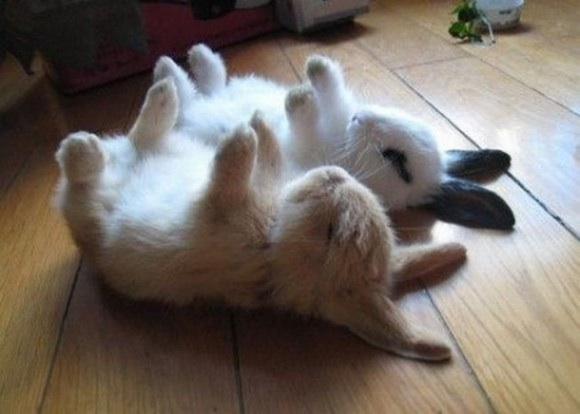

In [45]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

Zadziała, ale kiepsko (funkcja jest dużo bardziej skomplikowana (bo hipoteza stała się nieliniowa) i bardzo często będziemy wpadać w kiepskie minimum lokalne)
Poza tym, nowe hipotezy bywają jeszcze bardziej skomplikowane (np. cosinus hiperboliczny).

Funkcja kosztu może stać się nie wypukła

##Rozwiązanie: Logit 

Funkcja kosztu (J) dla regresji logistycznej wygląda następująco: 
$$  Cost(x) = \left\{
  \begin{array}{l l}
    - \log{(h_\Theta (x))} & \quad \text{jesli $y = 1$}\\
    - \log{(1 - h_\Theta (x))} & \quad \text{jesli $y = 0$}
  \end{array} \right.
  $$

### Dlaczego tak ?
* logarytm jest operacją odwrotną w stosunku do $e^x$
* Ta funkcja ma wygodną własność, jeśli $y = 1$ i $h_\Theta(x) = 1$ wtedy $J(x) = 0$, czyli koszt jest zerowy, jeśli prognoza pokryła się z wartością oczekiwaną


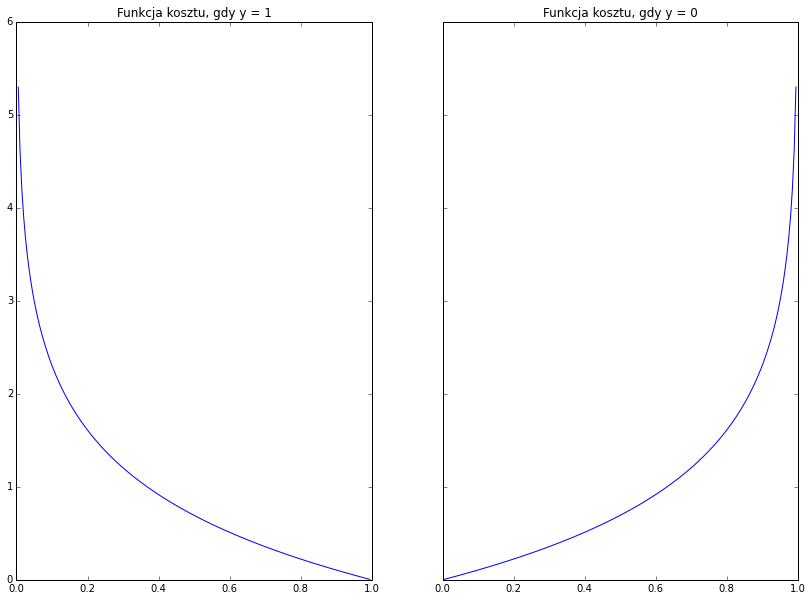

In [73]:
x = np.arange(0, 1, 0.005)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, [-np.log(a) for a in x], 'b')
ax1.set_title('Funkcja kosztu, gdy y = 1')
ax2.plot(x, [-np.log(1 - a) for a in x], 'b')
ax2.set_title('Funkcja kosztu, gdy y = 0')

### Fajnie, ale jak wrzucić coś takiego do algorytmu największego spadku gradientu?
Ponieważ y może mieć tylko jedną z dwóch wartości (0 lub 1), funkcje kosztu można przepisać na wygodniejszą postać

$$ Cost(x, y) = -y \log{(h_\Theta (x) )} - (1-y) \log{(1 - h_\Theta (x))} $$

To oczywiście koszt dla pojedynczej próby, koszt całkowity wyraża się wzorem:

$$ J(\Theta) =-\frac{1}{m} [\sum \limits_{i=1}^m (-y \log{(h_\Theta (x) )} - (1-y) \log{(1 - h_\Theta (x))})] $$
 a naszym celem jest jak zwykle znalezienie
 
$$ \min \limits^{}_{\Theta} J(\Theta)$$

### Czas na optymalizacje

Algorytm największego spadku gradientu przyjmuje dokładnie taką samą postać jak ostatnio

$$REPEAT\ UNITL\ COVERGENCE:\ \{ \\
\Theta_0 = \Theta_0 - \alpha \cdot \frac{1}{m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)})) \\
\Theta_1 = \Theta_1 - \alpha \cdot \frac{1}{m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)})) \cdot x^{(i)} \\ \} $$
gdzie $\alpha$ - Stała uczenia

Zmieniła się jedynie postać funkcji $h(x)$
$$ h_\Theta (x) = \frac{1}{1+e^{-\Theta^TX}}$$

## Zaawansowane metody optymalizacji
Tak jak wspominałem, istnieje znacznie więcej metod optymalizacji, każda z nich ma swoje wady i zalety, największą zaletą algorytmu największego spadku gradientu jest jego prostota.
####Bardziej zaawansowane metody optymalizacji
* Conjugate gradient
* BFGS
* L-BFGS
Nie ma sensu implementować ich samodzielnie, każdy język programowania ma pakiety, w których te algorytmy zostały zaimplementowane

# Studium przypadku
Zbiór danych zawiera wyniki studentów z dwóch testów semestralnych, i informacje czy student zdał egzamin końcowy, czy nie.

In [145]:
data = pd.read_csv('data/log_reg.csv')
data.columns = ['Midterm 1', 'Midterm 2', 'Passed']
data.head(10)

,Midterm 1,Midterm 2,Passed
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
5,61.106665,96.511426,1
6,75.024746,46.554014,1
7,76.098787,87.420570,1
8,84.432820,43.533393,1
9,95.861555,38.225278,0


## Jak wyglądają dane?

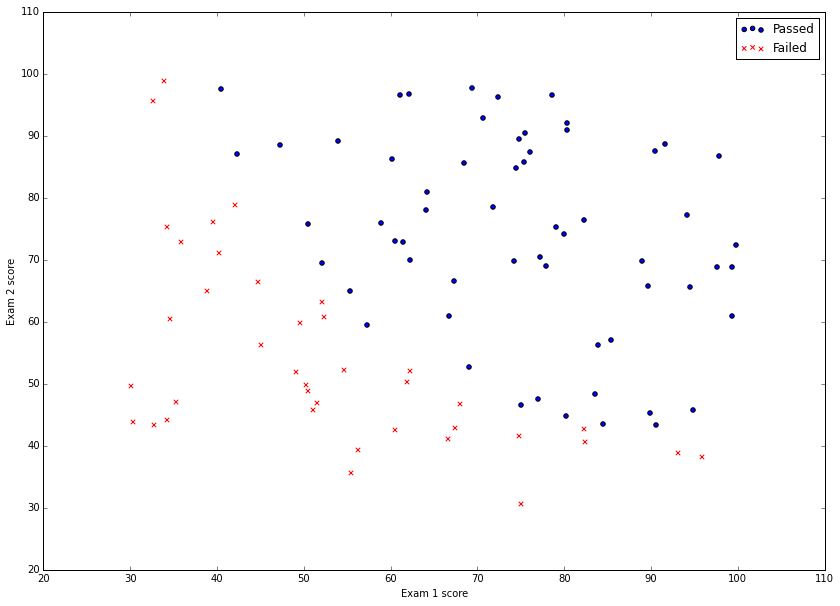

In [146]:
pylab.rcParams['figure.figsize'] = (14.0, 10.0)

X = data[['Midterm 1', 'Midterm 2']].values
y = data['Passed'].values
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Passed', 'Failed'])
plt.show()

Wyraźnie widać, że dane da się rozdzielić linią prostą, która będzie w stanie dość dokładnie rozdzielić dwie klasy. 
## Implementacja regresji liniowej

In [148]:
def cost(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    log_l = (-y)*np.log(h) - (1-y)*np.log(1-h) 
    return log_l.mean()

def grad(theta, X, y):
    h= sigmoid(np.dot(X, theta))
    grad = np.dot(h - y, X_1) / y.size 
    return grad

theta = 0.1 * np.random.randn(3)
X_1 = np.append( np.ones((X.shape[0], 1)), X, axis=1)# dodatkowa kolumna jedynek

theta = opt.fmin_bfgs(cost, theta, fprime=grad, args=(X_1, y)) # Czasem nie zbiega! 

Optimization terminated successfully.
         Current function value: 0.204557
         Iterations: 27
         Function evaluations: 36
         Gradient evaluations: 36


## Jak przewidywać na podstawie wyznaczonych $\Theta$?

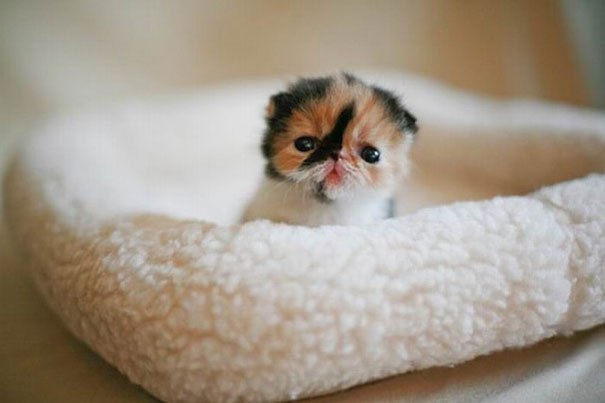

In [168]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

In [149]:
def predict(theta, X):
    p_1 = sigmoid(numpy.dot(X, theta))
    return p_1 > 0.5

## Jak wygląda granica decyzyjna?
Jak ją wyznaczyć?
Przy pomocy parametrów $\Theta$ powstaje funkcja w postaci
$$ \Theta_2 x_2 + \Theta_1  x_1 + \Theta_0 = 0 | -\Theta_1  x_1 + \Theta_0$$
$$ \Theta_2 x_2 =  -1 \cdot (\Theta_1  x_1 + \Theta_0) | : \Theta_2$$
$$ x_2 =  -\frac{1}{\Theta_2} \cdot (\Theta_1  x_1 + \Theta_0) $$

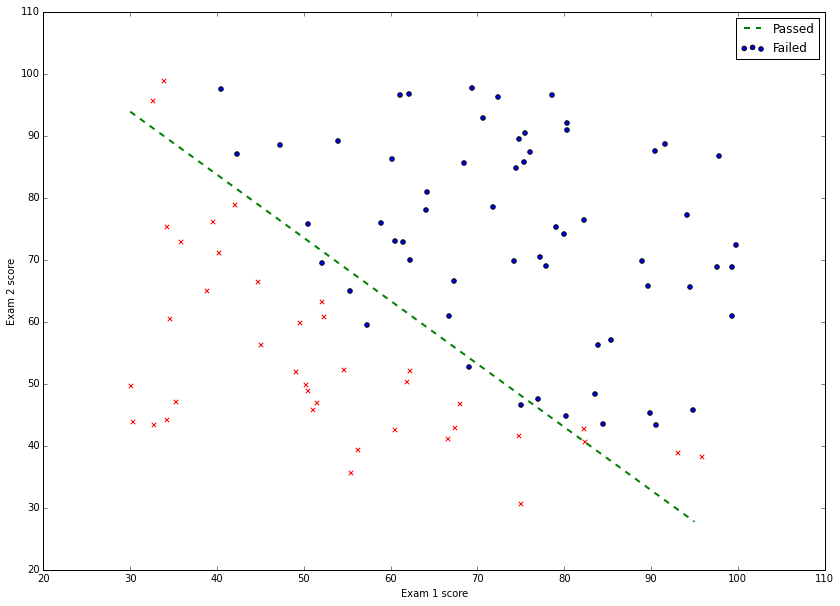

In [163]:
f = lambda a: -1.0 /theta[2] * ((theta[1] * a )+theta[0])

pos = where(y == 1)
neg = where(y == 0)
plt.plot([30, 95], [f(30), f(95)], 'g--', lw=2)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Passed', 'Failed'])
plt.show()

Na powyższym wykresie dokładnie widać, że nasz klasyfikator jest całkiem dobry, jak to jednak zweryfikować w przypadku, gdy zbiór ma o wiele więcej cech, i nie da się go łatwo zwizualizować?

In [152]:
predicted = [predict(theta, x) for x in X_1]
print metrics.classification_report(y, predicted)

             precision    recall  f1-score   support

          0       0.87      0.85      0.86        39
          1       0.90      0.92      0.91        60

avg / total       0.89      0.89      0.89        99



# Nieliniowe granice decyzyjne 
Podobnie jak w modelach regresji o których rozmawialiśmy w ubiegłym tygodniu, nic nie stoi na przeszkodzie, żeby granica decyzyjna była nieliniowa, wszystko jak zawsze zależy od danych
$$ h_\Theta (x) = g(\Theta_0 + \Theta_1 x_1 + \Theta_2 x_2 + \Theta_3 x_1^2 + \Theta_4 x_2^2)$$

# Regularyzacja
 ## Problem overfittingu i underfittingu
 Trzy poniższe wykresy pokazują próby dopasowania trzech różnych hipotez (wielomianów rożnego stopnia) do zadanych danych wejściowych (wygenerowanych na podstawie wyrysowanej na zielono funkcji)

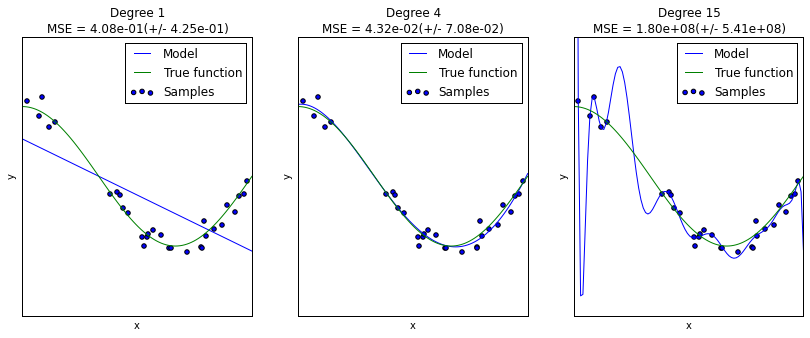

In [166]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

Oczywiście środkowy model przedstawia sytuację idealną, i bardzo dobre dopasowanie.

Wykres z lewej przedstawia problem "underfittingu", próbowaliśmy dopasować funkcje liniową, do danych mających wybitnie nieliniowy charakter. Sytuacja ta jednak nie jest specjalnie groźna, łatwo zorientujemy się w problemie, ponieważ wartość funkcji kosztu dla tego modelu będzie bardzo wysoka.

Dużo poważniejszym problemem jest "overfitting", przedstawiony na wykresie z prawej strony. Tutaj ewidentnie widać, że dopasowana hipoteza jest wielomianem zbyt wysokiego stopnia, a funkcja cechuję się gigantyczną wariancją względem danych uczących, co czyni ją niewątpliwie złym dopasowaniem. Skąd jednak mamy to wiedzieć? Wartość funkcji kosztu może być dalece niższa niż przy poprawnie dopasowanym wielomianie stopnia 4 (środkowy rysunek).

### Jak można rozwiązać problem overfittingu?

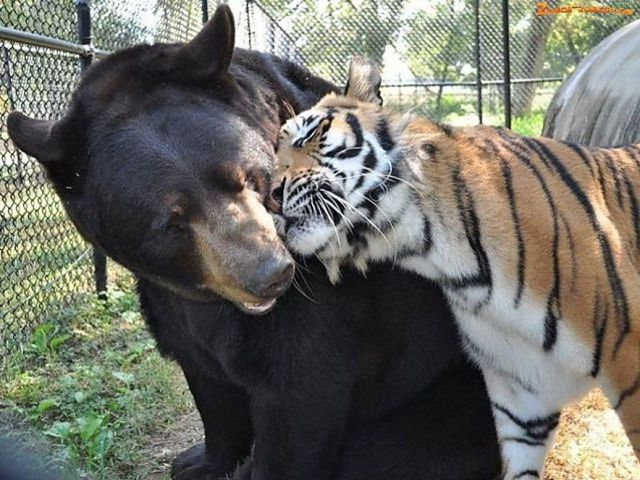

In [167]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

Problem rozwiązuje (przynajmniej częściowo) regularyzacja, czyli obciążenie funkcji kosztu dodatkowym elementem proporcjonalnym do wartości $\Theta$

To prowadzi nas do nowej, "regularyzowanej" funkcji kosztu

Funkcja kosztu: $$J (\Theta) = \frac{1}{2 \cdot m} \cdot \Bigg[ \sum \limits^m_{i=1} (h_\Theta(x^{(i)}) - y^{(i)})^2 +
\lambda \cdot \sum \limits_{j=1}^m \Theta_j^2 \Bigg]$$

#### Dlaczego rozwiązuje problem "częściowo"?
* Najlepiej sprawdza się, gdy mamy wiele cech, które w podobnym stopniu wpływają na predykcje
* Wymaga dobrania $\lambda$ (zwykle uznaniowo, choć istnieją metody wyboru automatycznego)
* Źle dobrana lambda może powodować problemy (np. underfitting)

## Normal equations z Regularyzacją

$$ \Theta = (X^T\cdot X + \lambda \cdot \begin{bmatrix} 0 & 0 &  \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & 0 & \ddots & \vdots \\ 0 & \cdots & 0 & 1\end{bmatrix})^{-1} \cdot X^T \cdot y$$



Gdzie:
* $\Theta \in \mathbb{R}^{n+1}$ - współczynniki hipotezy
* X - Macierz ze wszystkimi zmiennymi (rozmiar mieszkania, ilość łazienek) WAŻNE: pierwsza kolumna wypełniona jedynkami
* y - wektor odpowiedzi

# A co, jeśli mamy więcej niż dwie klasy?
## Algorytm all-vs-one
Najprostszym (i bardzo skutecznym) rozwiązaniem problemu jest podejście jeden-vs-wszyscy
* Tworzymy dokładnie tyle hipotez ile mamy klas
* Każda z hipotez rozpoznaje czy dany problem należy do jednej z klas czy nie należy (sklejamy wszystkie klasy poza tą, którą przewidujemy w jedną)
* Predykcja polega na wyborze klasy, która da z hipotezy (funkcji sigmoidalnej) wartość najbliższą 1

# Podsumowanie, czyli jak podejść do rozwiązania problemu klasyfikacji przy użyciu regresji logistycznej ?
1. Poznaj swoje dane!
2. Jeśli potrzebujesz wybierać pomiędzy więcej niż dwoma klasami, zastosuj all-vs-one
2. Napisz funkcje kosztu (z regularyzacją !) i gradient (jej pochodną)
3. Wybierz jakaś hipotezę (na podstawie wizualizowanych danych)
4. Skorzystaj (nie pisz samemu!) z funkcji optymalizacyjnych w bibliotekach twojego języka programowania
5. Podziel zbiór danych na uczący (60 %), cross-validacyjny (20%) i testowy (20%)
6. Przy pomocy zbioru walidującego dobierz najlepsze parametry (np. $\alpha$, $\lambda$)
7. Próbuj dobierać inne hipotezy
8. Wyznacz parametry theta
9. Sprawdź metryki (zwłaszcza F1-Score) na zbiorze testowym
10. Predykuj!

#Dzięki!


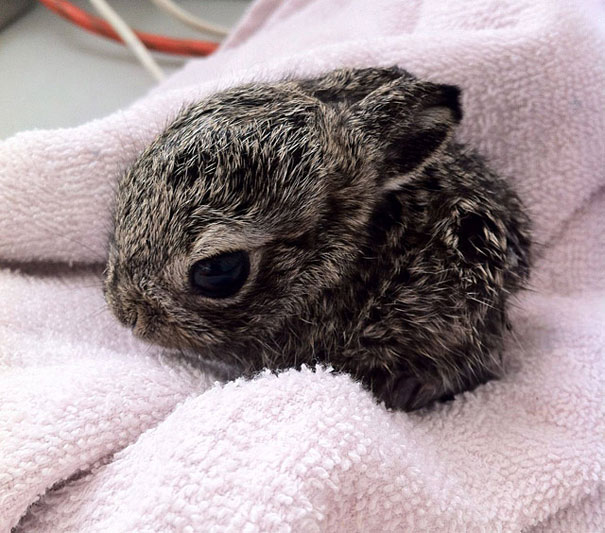

In [170]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))